# Covid and its financial impacts

In this notebook, you will compile the visualizations from the analysis into functions that can be used for a Panel dashboard.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv
import pycountry
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2


Bad key savefig.frameon in file C:\Users\chapm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\chapm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\chapm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

#### Jay's dataframes 

In [2]:
file_path = Path("Data\owid-covid-data-20210928.csv")
covid_data = pd.read_csv(file_path)
#creating a new field 'Date' field off the back of 'date' and making it only as a date format of YYYY-MM-DD
covid_data['Date'] = pd.to_datetime(covid_data['date']).dt.date 
#covid_data
analysis = covid_data[['date','continent','location','total_cases','population_density','gdp_per_capita','reproduction_rate','total_vaccinations_per_hundred']]#.set_index('Date')
# removing any noise from the data set
analysis = analysis[(analysis['location'] != analysis['continent']) & (~analysis['continent'].isnull())]
analysis = analysis.fillna(0)
#analysis.info()
continent = analysis.groupby(['location'])['total_cases','population_density','gdp_per_capita','reproduction_rate','total_vaccinations_per_hundred'].mean().reset_index().sort_values(by='total_cases')
continent.head()

location  total_cases  population_density  gdp_per_capita  \
134              Montserrat          0.0               0.000             0.0   
201                 Tokelau          0.0               0.000             0.0   
149         Northern Cyprus          0.0               0.000             0.0   
28   British Virgin Islands          0.0             207.973             0.0   
82                 Guernsey          0.0               0.000             0.0   

     reproduction_rate  total_vaccinations_per_hundred  
134                0.0                        4.142342  
201                0.0                        2.463509  
149                0.0                        2.673131  
28                 0.0                       11.335943  
82                 0.0                       37.056885

#### Luke's dataframes

In [3]:
# Set the file paths
audusd_data = Path("Data/audusd.csv")
cadusd_data = Path("Data/cadusd.csv")
chfusd_data = Path("Data/chfusd.csv")
eurusd_data = Path("Data/eurusd.csv")
gbpusd_data = Path("Data/gbpusd.csv")
usdcny_data = Path("Data/usdcny.csv")
usdjpy_data = Path("Data/usdjpy.csv")
sp500_data = Path("Data/sp500.csv")
vix_data = Path("Data/vix_history.csv")
xlb_data = Path("Data/xlb.csv")
xle_data = Path("Data/xle.csv")
xlf_data = Path("Data/xlf.csv")
xli_data = Path("Data/xli.csv")
xlp_data = Path("Data/xlp.csv")
xlu_data = Path("Data/xlu.csv")
xlv_data = Path("Data/xlv.csv")
xly_data = Path("Data/xly.csv")
covid_data = Path("Data/covid19_global_table_data.csv")

# Read the CSVs and set the `Date` column as a datetime index to the DataFrame
# Currency
audusd_df = pd.read_csv(audusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cadusd_df = pd.read_csv(cadusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
chfusd_df = pd.read_csv(chfusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
eurusd_df = pd.read_csv(eurusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
gbpusd_df = pd.read_csv(gbpusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdcny_df = pd.read_csv(usdcny_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdjpy_df = pd.read_csv(usdjpy_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# S&P500 & Volatility Index
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_df = pd.read_csv(vix_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_close_df = vix_df.drop(columns=['Open','High','Low'])
# Sectors : Energy. XLE, Materials.XLB, Industrials.XLI, Utilities. XLU, Healthcare.XLV, 
#           Financials.XLF, Consumer Discretionary.XLY, Consumer Staples.XLP
xlb_df = pd.read_csv(xlb_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xle_df = pd.read_csv(xle_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlf_df = pd.read_csv(xlf_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xli_df = pd.read_csv(xli_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlp_df = pd.read_csv(xlp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlu_df = pd.read_csv(xlu_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlv_df = pd.read_csv(xlv_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xly_df = pd.read_csv(xly_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Covid 19 global data
covid_df = pd.read_csv(covid_data, index_col= 0, infer_datetime_format=True, parse_dates=True)
# Create a new pivot table where the columns are the closing prices for each pair
fx_combined_df = pd.concat([audusd_df, eurusd_df, gbpusd_df], axis="columns", join="inner")#, cadusd_df, chfusd_df, sp500_df, usdcny_df, usdjpy_df
# Create a new pivot table where the columns are the closing prices for each sector
sector_combined_df = pd.concat([xlb_df, xle_df, xlf_df, xli_df, xlp_df, xlu_df, xlv_df, xly_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
fx_combined_df.sort_index(inplace=False)
sector_combined_df.sort_index(inplace=False)

# Set column names
fx_combined_df.columns = ['AUDUSD', 'EURUSD', 'GBPUSD']# 'CADUSD', 'CHFUSD', 'USDCNY', 'USDJPY']#, 'SP500']
sector_combined_df.columns = ['Materials', 'Energy', 'Financials', 'Industrials', 'Cons Staples', 'Utilities', 'Healthcare', 'Cons Disc']
fx_daily_change = fx_combined_df.pct_change()
sector_daily_change = sector_combined_df.pct_change()
sector_daily_change_std = sector_daily_change.std
sector_daily_change_sum = sector_daily_change.cumsum()
sector_daily_change_sum.head()
sector_correlation = sector_daily_change.corr()



#### Chapman's dataframes

In [4]:
# load the csv files into dataframes and do some simple cleaning
health_expenditure_df = pd.read_csv("Data\health_expenditure_per_capita.csv")
health_expenditure_df.dropna(inplace=True)

covid_df = pd.read_csv("Data\JHcovid12-31-2020.csv")
covid_df = covid_df[["Country_Region", "Confirmed", "Deaths", "Case_Fatality_Ratio"]]
grouped = covid_df.groupby("Country_Region").sum()

life_expectancy_df = pd.read_csv("Data\life_expectancy_data.csv")
life_expectancy_df.columns = ["Country", "Life Expectancy"]
life_expectancy_df.set_index("Country", inplace=True)

#### Max's dataframes

In [5]:
#GDP Dataframe, Api Usage, New Python
data = pd.read_csv("Data\GDP_DF.csv")

countries_list = [x.alpha_3 for x in pycountry.countries]
result = data['Country Code'].isin(countries_list)
n=[]
for x in range(len(result)):
    if(result[x]==False):
        n.append(x)
len(n)
only_countries_df = data.drop(n,axis=0)

only_countries_df.set_index('Country Name',inplace=True)


aus_gdp = only_countries_df.loc['Australia'][38:64]
can_gdp = only_countries_df.loc['Canada'][38:64]
fra_gdp = only_countries_df.loc['France'][38:64]
ger_gdp = only_countries_df.loc['Germany'][38:64]
grc_gdp = only_countries_df.loc['Greece'][38:64]
ita_gdp = only_countries_df.loc['Italy'][38:64]
jpn_gdp = only_countries_df.loc['Japan'][38:64]
esp_gdp = only_countries_df.loc['Spain'][38:64]
swe_gdp = only_countries_df.loc['Sweden'][38:64]
gbr_gdp = only_countries_df.loc['United Kingdom'][38:64]
usa_gdp = only_countries_df.loc['United States'][38:64]

#gdp DF condensed with Relevent countries
gdp_df = pd.concat([
    aus_gdp, can_gdp, fra_gdp, ger_gdp, grc_gdp,
    ita_gdp, jpn_gdp, esp_gdp, swe_gdp, gbr_gdp, usa_gdp], axis=1)
    
    
# Gov Debt to GDP
gov_dbt = pd.read_csv("Data\DP_LIVE_30092021104414117.csv")
gov_dbt = gov_dbt.rename(columns={'LOCATION': 'COUNTRY', 'TIME': 'YEAR', 'Value': 'Debt to GDP %'})
#grab relevent columns to plot
debt_value_loc = gov_dbt.loc[:, ['COUNTRY', 'YEAR', 'Debt to GDP %']]
debt_value_loc.set_index('COUNTRY')
    
#new DF with relevent countries
aus_data = debt_value_loc.loc[0:25]
can_data = debt_value_loc.loc[77:102]
fra_data = debt_value_loc.loc[182:206]
ger_data = debt_value_loc.loc[206:230]
grc_data = debt_value_loc.loc[231:256]
ita_data = debt_value_loc.loc[305:329]
jpn_data = debt_value_loc.loc[330:354]
esp_data = debt_value_loc.loc[527:552]
swe_data = debt_value_loc.loc[553:578]
gbr_data = debt_value_loc.loc[612:637]
usa_data = debt_value_loc.loc[638:663]

debt_to_gdp = pd.concat([
    aus_data, can_data, ger_data, esp_data, fra_data, gbr_data, ita_data,
    jpn_data, swe_data, usa_data]).set_index('YEAR')




In [6]:
#Jay's functions to produce graphs
def gdp_per_capita():
    
    output = px.parallel_coordinates(continent, color='gdp_per_capita', title ='Multi-Dimensional plot vs GDP per Capita',)
    
    return output
def vaccinations_gdp_per_capita():
    
    fig3 = px.scatter(
    continent,
    y='gdp_per_capita',
    x='total_vaccinations_per_hundred',
    color = 'total_vaccinations_per_hundred',
    trendline="ols",
    title ='GDP per Capita vs Total Vaccinations per Hundred',
        hover_data=['location'],
        marginal_y="histogram"
)

    return fig3

def pop_density_total_cases():
    fig = px.scatter(continent, x="population_density", y="total_cases", trendline="ols", color="total_cases", hover_data=['location'], title ='Population Density vs Total Cases', log_x=True, 
                     #log_y=True
                    )
    return fig

#Luke's functions
def fx_daily_change_plot_1():
    fx_daily_change_plot_1 = px.line(fx_daily_change, title="Currency Daily Changes" )
    return fx_daily_change_plot_1

def sector_daily_change_sum_plot_1():
    sector_daily_change_sum_plot_1 = px.line(sector_daily_change_sum, title="Sector Daily Changes Sum Plot")
    return sector_daily_change_sum_plot_1

def sp500_plot_1():
    sp500_plot_1 = px.line(sp500_df, title="S&P 500 Historical Plot")
    return sp500_plot_1

def fx_daily_plot_1():
    fx_daily_plot_1 = px.line(fx_combined_df, title="Global Currencies v's the US Dollar")
    return fx_daily_plot_1

def vix_change_plot():
    vix_change_plot = px.line(vix_close_df, title="Volatility Index AKA The Fear Index")
    return vix_change_plot

def sector_correlation_heatmap():
    sector_correlation_heatmap = px.imshow(sector_correlation, title='Sector Correlations')
    return sector_correlation_heatmap

#Chapman's functions
def random_countries(n, lower, upper):
    grouped_filtered = grouped[(grouped["Case_Fatality_Ratio"] > lower) & (grouped["Case_Fatality_Ratio"] < upper)]
    global random 
    random = grouped_filtered.sort_values("Confirmed").sample(n=n)
    random.rename_axis("Country", inplace=True)
    global random_list
    random_list = list(random.index)
    
    
# function that returns two plots for "Deaths" and "Cases" Vs life expectancy for the randomly selected countries
def plot_life_expectancy(): 
    random_life_expectancy = life_expectancy_df[life_expectancy_df.index.isin(random_list)]
    covid_life_expectancy = pd.concat([random, random_life_expectancy], axis="columns", join="inner")
    return covid_life_expectancy.hvplot.scatter(x="Life Expectancy", y="Deaths", by="Country", title="Life Expectancy Vs Deaths") + covid_life_expectancy.hvplot.scatter(x="Life Expectancy", y="Confirmed", by="Country", title="Life Expectancy Vs Cases")

# function that returns two plots for "Deaths" and "Cases" Vs health expenditure per person for the randomly selected countries
def plot_health_expenditure():
    random_health_df = health_expenditure_df[health_expenditure_df["Country"].isin(random_list)]
    random_health_df.set_index("Country", inplace=True)
    combined_df = pd.concat([random, random_health_df], axis="columns", join="inner")
    return combined_df.hvplot.scatter(x="International Dollar Per Capita (PPP)", y="Deaths", by="Country", title="Health Expenditure Per Person Vs Deaths") + combined_df.hvplot.scatter(x="International Dollar Per Capita (PPP)", y="Confirmed", by="Country", title="Health Expenditure Per Person Vs Cases")


# Max's functions

def get_largest_GDP(year):
    d = only_countries_df.nlargest(10,year)[year].tolist()
    c = only_countries_df.nlargest(10,year)['Country Name'].tolist()
    plt.figure(figsize=(7,7))
    plt.title(label= "GDP Contribution of the top 10 countries in " + year, fontsize=20, fontweight=20)
    plt.pie(d,labels=c, startangle=80)
    plt.show()
    return plt.show()

def get_GDP_plot():
    plt.figure(figsize=(30,22))
    plt.title(label= 'Largest GDP comparison, from 1960 - 2019', fontsize=30, fontweight=20)
    plt.ylabel('GDP in terms of $', fontsize=30)
    plt.xlabel('Years',fontsize=30)
    plt.plot(np.arange(1960,2021),only_countries_df.loc['United States'][3:64],label='USA')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['China'][3:64],label='CHI')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['Japan'][3:64],label='JAP')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['Germany'][3:64],label='GER')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['India'][3:64],label='IND')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['United Kingdom'][3:64],label='UK')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['France'][3:64],label='FRA')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['Italy'][3:64],label='ITA')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['Brazil'][3:64],label='BRA')
    plt.plot(np.arange(1960,2021),only_countries_df.loc['Canada'][3:64],label='CAN')
    plt.legend(prop={'size': 30})
    plt.xticks(np.arange(1960,2021),np.arange(1960,2021), rotation=45)
    plt.grid()
    return plt.show()



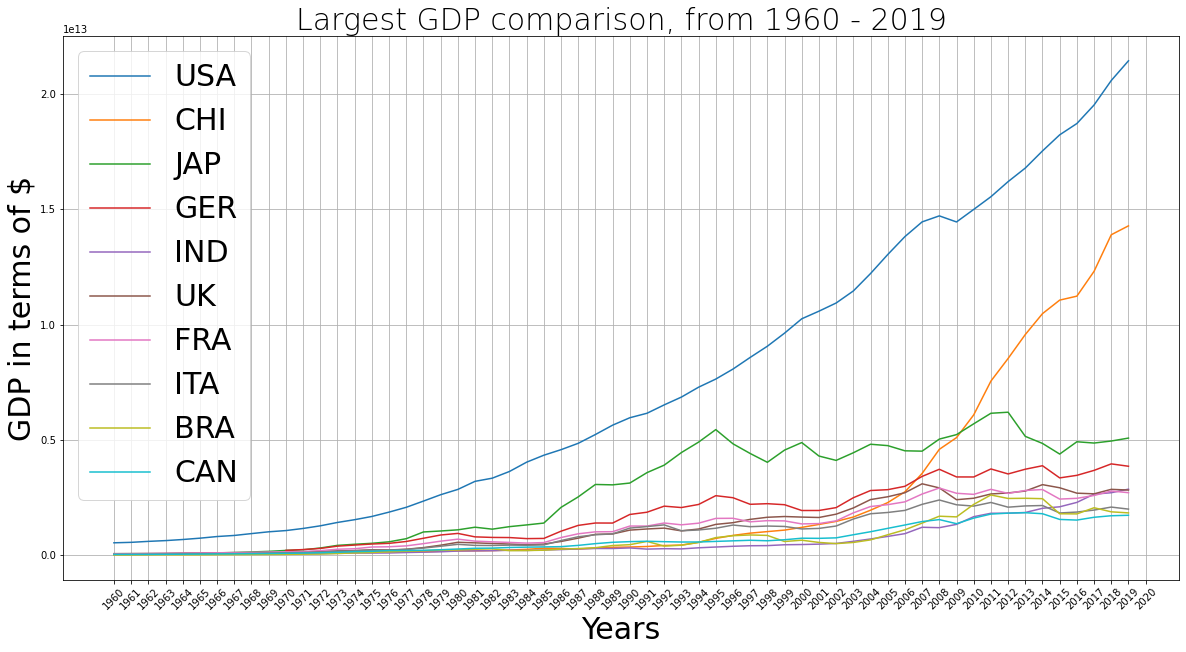

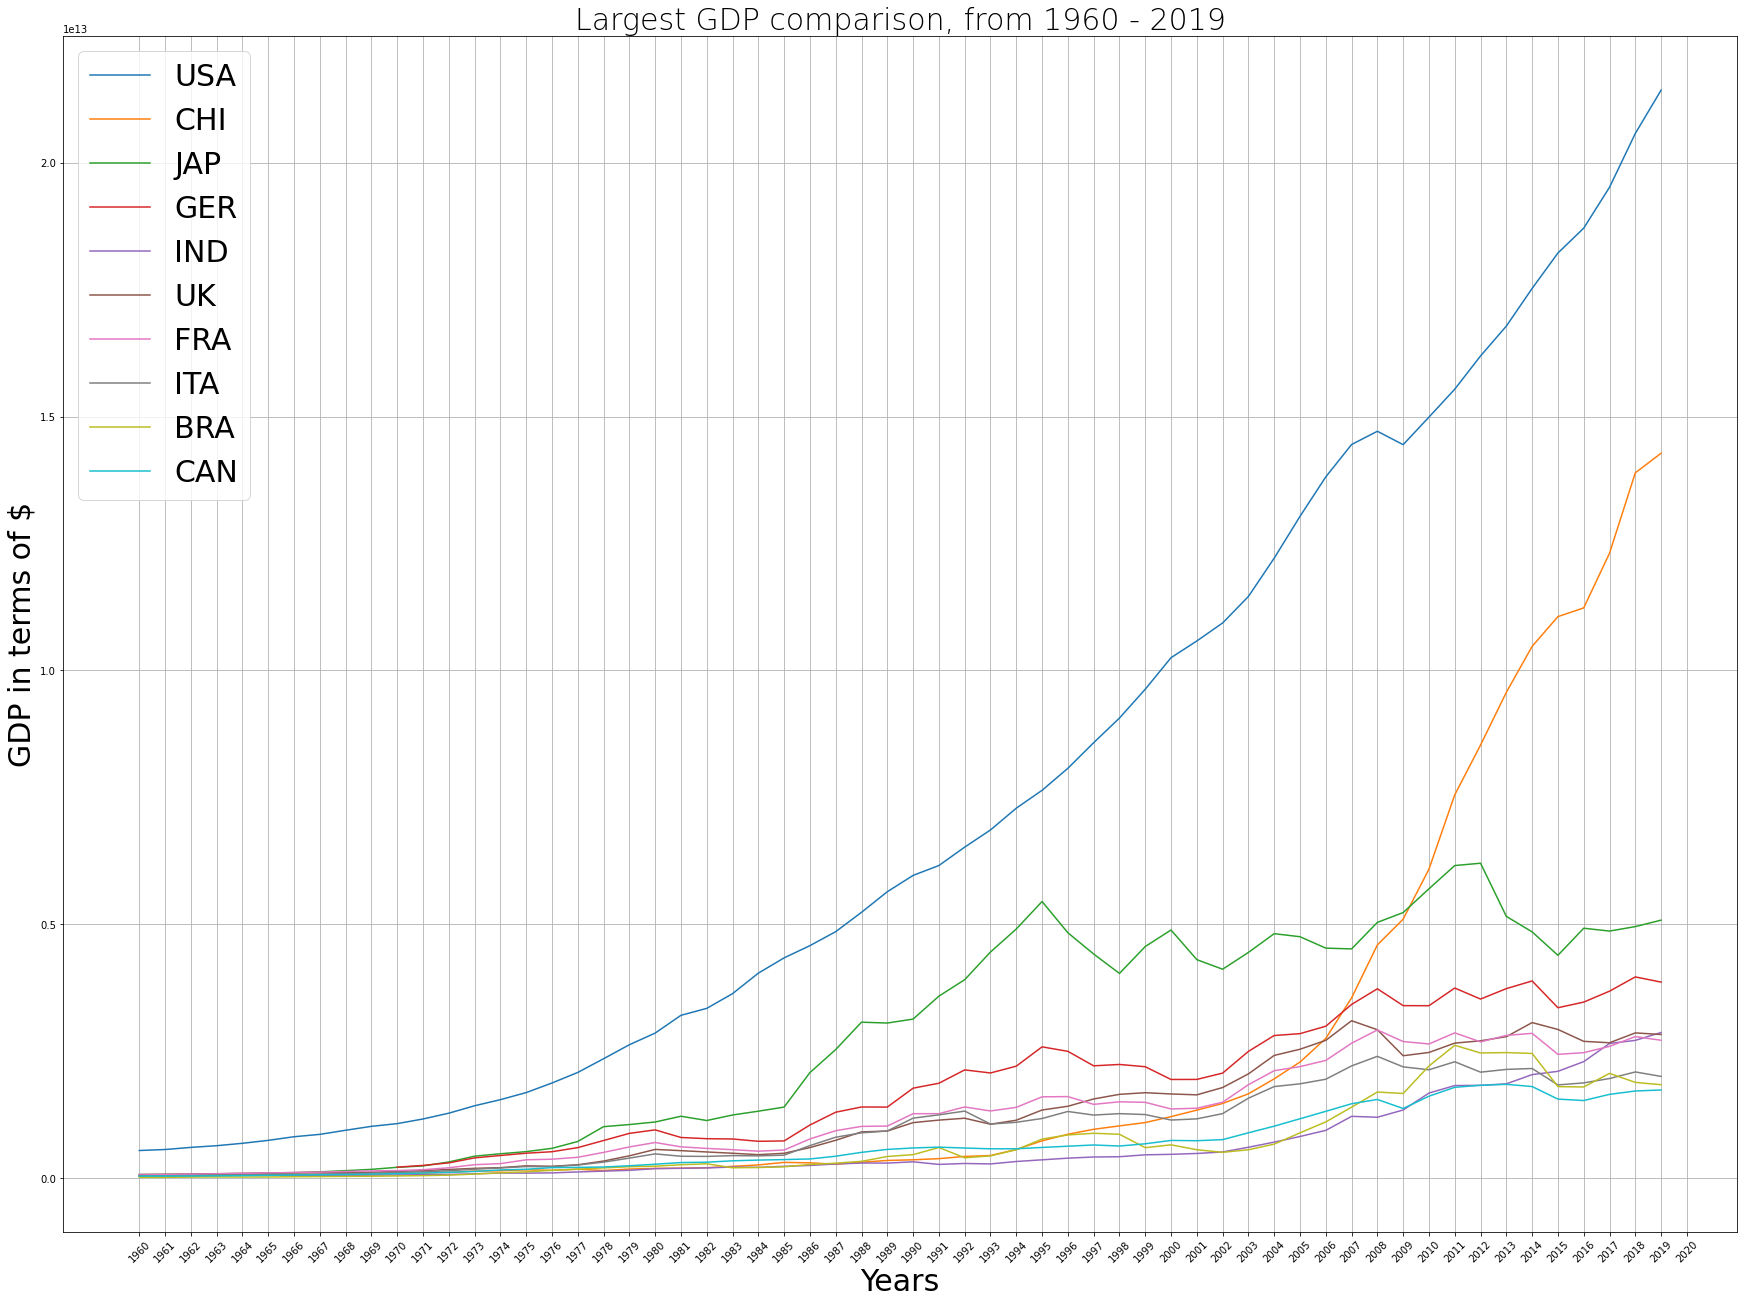

In [7]:
#Jay's Panels
parallel_coordinates = pn.Row(
    '## Tab 1',
    gdp_per_capita()
)

tab2 = pn.Row(  
    '## Tab2',
    vaccinations_gdp_per_capita(),
    pop_density_total_cases()
)
# Luke's panels
# Put covid plots in a single row
row_of_currency = pn.Row(fx_daily_plot_1(), fx_daily_change_plot_1())# fx_pair_plot, , fx_correlation_heatmap, fx_daily_change_plot_1, fx_change_covid)
row_of_sector = pn.Row(sector_daily_change_sum_plot_1(),sector_correlation_heatmap())
row_of_sp500vix = pn.Row(vix_change_plot(), sp500_plot_1())#sp_vix_combined_plot,
plots_as_column = pn.Column("## Covid 19's Effect on the world economy", row_of_sp500vix)


#Chapman's panels
# create widgets
n_slider = pn.widgets.IntSlider(name='Set No. of Countries', start=10, end=100, step=5, value=30)
lower_slider = pn.widgets.FloatSlider(name='Set min fatality rate', start=0, end=5, step=.1, value= 0.8)       
upper_slider = pn.widgets.FloatSlider(name='Set max fatality rate', start=0, end=5, step=.1, value = 1.5)
button = pn.widgets.Button(name='Generate data and graph', button_type='primary')

# A helper function to call random_countries when button is clicked. Must be declared after the widgets have been created since it references them.
def random_countries_f(event):
    random_countries(n_slider.value, lower_slider.value, upper_slider.value)
    chapman_layout[1].object = plot_health_expenditure()
    chapman_layout[2].object = plot_life_expectancy()
    

# initiate starting data
random_countries(30, .8, 2.5)

button.on_click(random_countries_f)
chapman_layout = pn.Column(pn.Column(n_slider, lower_slider, upper_slider, button), plot_health_expenditure(), plot_life_expectancy())

#Max's panels / plots

gdp_df_plot= px.line(gdp_df,
title='Countries Gdp Relative to USD$',
                    )


debt_to_gdp_plot = debt_to_gdp.hvplot.line(
    title = 'List Countries Debt To GDP Ratio 1995-Current',
    x='YEAR',
    y='Debt to GDP %',
    by='COUNTRY',
    figsize=(50,30)
)


top_10_gdp_plot = plt.figure(figsize=(20,10))
plt.title(label= 'Largest GDP comparison, from 1960 - 2019', fontsize=30, fontweight=20)
plt.ylabel('GDP in terms of $', fontsize=30)
plt.xlabel('Years',fontsize=30)
plt.plot(np.arange(1960,2021),only_countries_df.loc['United States'][3:64],label='USA')
plt.plot(np.arange(1960,2021),only_countries_df.loc['China'][3:64],label='CHI')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Japan'][3:64],label='JAP')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Germany'][3:64],label='GER')
plt.plot(np.arange(1960,2021),only_countries_df.loc['India'][3:64],label='IND')
plt.plot(np.arange(1960,2021),only_countries_df.loc['United Kingdom'][3:64],label='UK')
plt.plot(np.arange(1960,2021),only_countries_df.loc['France'][3:64],label='FRA')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Italy'][3:64],label='ITA')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Brazil'][3:64],label='BRA')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Canada'][3:64],label='CAN')
plt.legend(prop={'size': 30})
plt.xticks(np.arange(1960,2021),np.arange(1960,2021), rotation=45)
plt.grid()

gdp_to_debt = pn.Column(gdp_df_plot, debt_to_gdp_plot) #top 10 GDP data, Debt to GDP % Data
top_10_gdp = pn.Row(get_GDP_plot())  

Tabs
    [0] Row
        [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'autosize': True})
    [1] Row
        [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': [-6.270153...}, visible=False)
        [2] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': [-1.198698...}, visible=False)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1990-01-...}, visible=False)
            [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1990-01-...}, visible=False)
    [3] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1998-12-...}, visible=False)
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1998-12-...}, visible=False)
    [4] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2019-01-...}, visible=False)
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': [-0.5, ...}, visible=False)
    [5] Column
        [0] Column
            [0] IntSlider(end=100, name='Set No. of Countries', start=10, step=5, value=40)
            [1] FloatSlider(end=5, name='Set min fatality rate', value=0.8)
            [2] FloatSlider(end=5, name='Set max fatality rate', value=1.9)
            [3] Button(button_type='primary', clicks=1, name='Generate data and graph')
        [1] HoloViews(Layout)
        [2] HoloViews(Layout)
    [6] Matplotlib(Figure, name='MM: Top 10 GDP 2019')
    [7] Column
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': [0, ...}, visible=False)
        [1] HoloViews(NdOverlay)
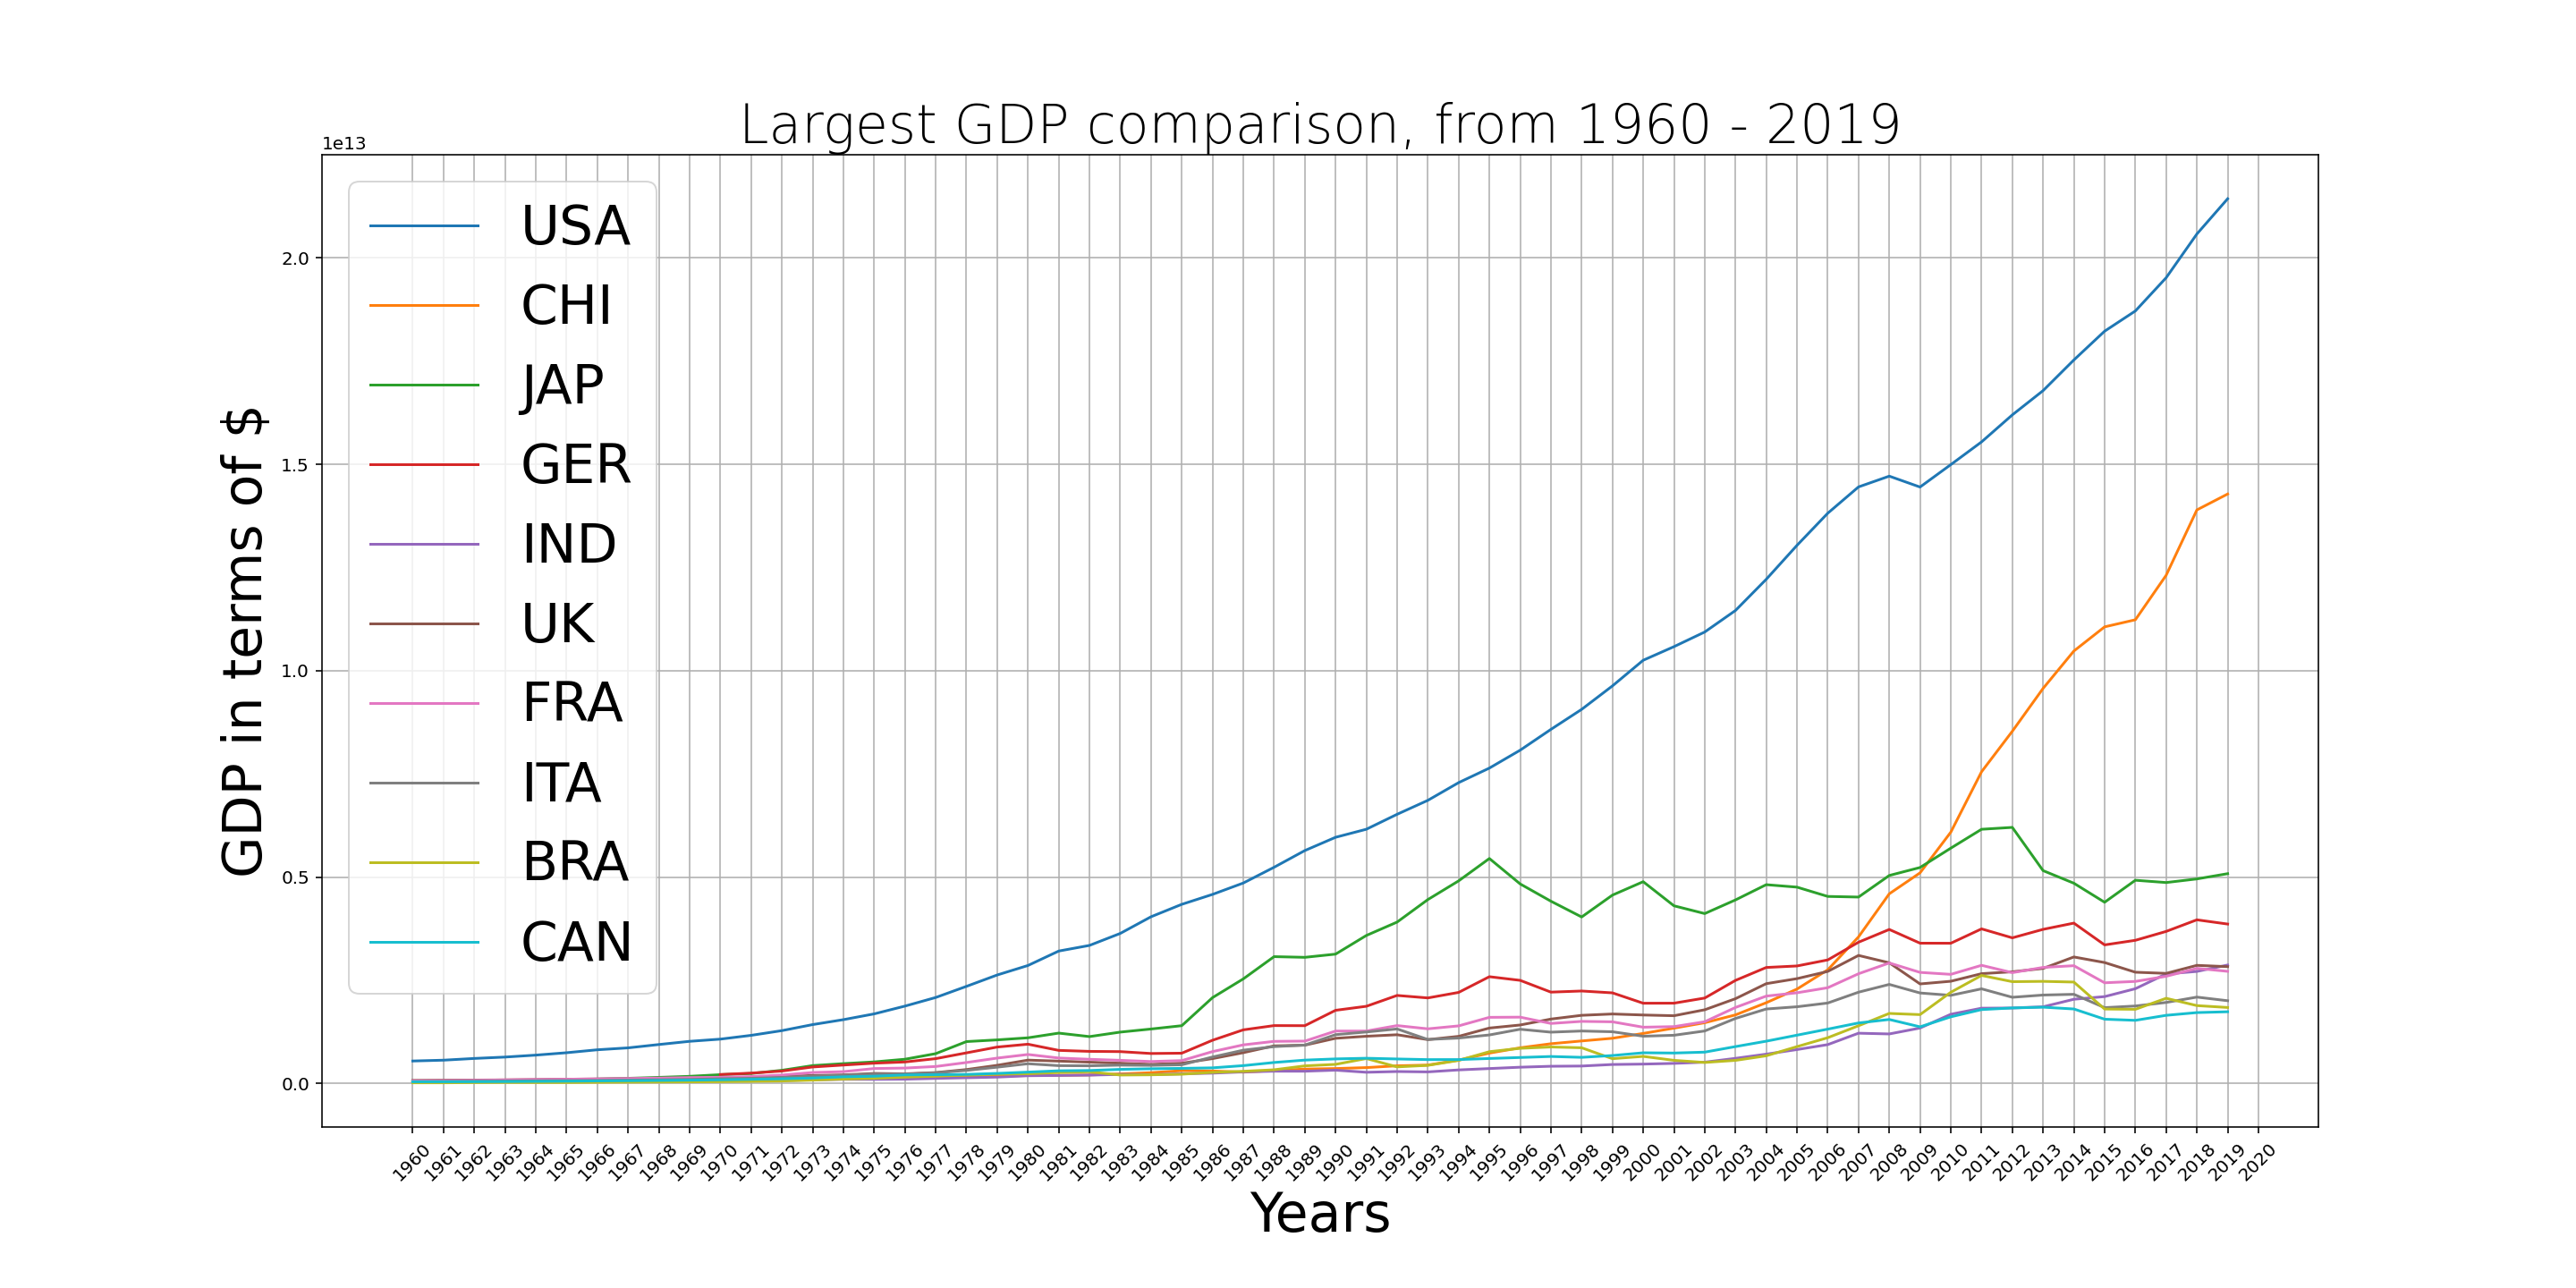

In [9]:
tabs = pn.Tabs(
    #("Welcome", welcome_column),
    ("JC: Multi-dimensional coordinates",parallel_coordinates),
    ("JC: Further analysis of Covid data", tab2),
    ("LM: S&P500", plots_as_column),
    ("LM: Currency Plots", row_of_currency),
    ("LM: Sector Plots", row_of_sector),
    ("CM: Chapman's Random generator", chapman_layout),
    ('MM: Top 10 GDP 2019', top_10_gdp_plot),
    ("MM: GDP & Debt", gdp_to_debt)
)


# Create the dashboard
tabs.servable()